# Data Preprocessing:
1. Import necessary libraries
2. Read dataset
3. Sanity check of data
4. Missing value treatments
5. Duplicates & garbage value treatments
6. Outliers treatment
7. Exploratory data analysis (EDA)
8. Encoding of data
9. Normalisation/ Standardization

# Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv("/content/drive/MyDrive/city_hour_transformed.csv")
df.head()

Mounted at /content/drive


,Unnamed: 0,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,...,State,Status,Region,Day_period,Month,Year,Season,Weekday_or_weekend,Regular_day_or_holiday,AQ_Acceptability
0,0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,...,Gujarat,Active,5. Western,4. Night,01. Jan,2015,1. Winter,Weekday,Regular day,Unacceptable
1,1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,...,Gujarat,Active,5. Western,4. Night,01. Jan,2015,1. Winter,Weekday,Regular day,Unacceptable
2,2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,...,Gujarat,Active,5. Western,4. Night,01. Jan,2015,1. Winter,Weekday,Regular day,Unacceptable
3,3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,...,Gujarat,Active,5. Western,1. Morning,01. Jan,2015,1. Winter,Weekday,Regular day,Unacceptable
4,4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,...,Gujarat,Active,5. Western,1. Morning,01. Jan,2015,1. Winter,Weekday,Regular day,Unacceptable


#Drop Xylene column

In [3]:
df.drop(columns=['Xylene'], inplace=True)
df.shape

(4476937, 28)

# Check null columns

In [4]:
df.isnull().sum()

,0
Unnamed: 0,0
City,0
Datetime,0
PM2.5,600906
PM10,1413338
NO,496494
NO2,497313
NOx,390824
NH3,1231007
CO,255065


#Data preprocessing using Simple Imputer for PM10 and NH3

In [5]:
from sklearn.impute import SimpleImputer
# Select the columns to impute
columns_to_impute = ['PM10', 'NH3']
# Initialize the SimpleImputer for mean imputation
mean_imputer = SimpleImputer(strategy='mean')
# Fit the imputer on the selected columns and transform them
df[columns_to_impute] = mean_imputer.fit_transform(df[columns_to_impute])
# Check for any remaining missing values
print(df.isnull().sum())
# Display the first few rows of the DataFrame
df.head()


Unnamed: 0                     0
City                           0
Datetime                       0
PM2.5                     600906
PM10                           0
NO                        496494
NO2                       497313
NOx                       390824
NH3                            0
CO                        255065
SO2                       623721
O3                        627541
Benzene                   484318
Toluene                   695586
AQI                       577120
AQI_Bucket                     0
StationId                      0
StationName                    0
State                          0
Status                         0
Region                         0
Day_period                     0
Month                          0
Year                           0
Season                         0
Weekday_or_weekend             0
Regular_day_or_holiday         0
AQ_Acceptability               0
dtype: int64


,Unnamed: 0,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,...,State,Status,Region,Day_period,Month,Year,Season,Weekday_or_weekend,Regular_day_or_holiday,AQ_Acceptability
0,0,Ahmedabad,2015-01-01 01:00:00,NaN,175.66042,1.00,40.01,36.37,33.800905,1.00,...,Gujarat,Active,5. Western,4. Night,01. Jan,2015,1. Winter,Weekday,Regular day,Unacceptable
1,1,Ahmedabad,2015-01-01 02:00:00,NaN,175.66042,0.02,27.75,19.73,33.800905,0.02,...,Gujarat,Active,5. Western,4. Night,01. Jan,2015,1. Winter,Weekday,Regular day,Unacceptable
2,2,Ahmedabad,2015-01-01 03:00:00,NaN,175.66042,0.08,19.32,11.08,33.800905,0.08,...,Gujarat,Active,5. Western,4. Night,01. Jan,2015,1. Winter,Weekday,Regular day,Unacceptable
3,3,Ahmedabad,2015-01-01 04:00:00,NaN,175.66042,0.30,16.45,9.20,33.800905,0.30,...,Gujarat,Active,5. Western,1. Morning,01. Jan,2015,1. Winter,Weekday,Regular day,Unacceptable
4,4,Ahmedabad,2015-01-01 05:00:00,NaN,175.66042,0.12,14.90,7.85,33.800905,0.12,...,Gujarat,Active,5. Western,1. Morning,01. Jan,2015,1. Winter,Weekday,Regular day,Unacceptable


# Imputer other columns with mean

In [6]:
numeric_columns = ['PM2.5', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene',]
for col in numeric_columns:
    if df[col].isnull().sum() / len(df) < 0.2:  # Check if missing percentage is below 20%
        mean_val = df[col].mean()  # Calculate mean
        df[col].fillna(mean_val, inplace=True)

In [7]:
df.isnull().sum()

,0
Unnamed: 0,0
City,0
Datetime,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0


# Drop rows where AQI is missing

In [8]:
df = df.dropna(subset=['AQI'])
print(df.isnull().sum())
df.shape

Unnamed: 0                0
City                      0
Datetime                  0
PM2.5                     0
PM10                      0
NO                        0
NO2                       0
NOx                       0
NH3                       0
CO                        0
SO2                       0
O3                        0
Benzene                   0
Toluene                   0
AQI                       0
AQI_Bucket                0
StationId                 0
StationName               0
State                     0
Status                    0
Region                    0
Day_period                0
Month                     0
Year                      0
Season                    0
Weekday_or_weekend        0
Regular_day_or_holiday    0
AQ_Acceptability          0
dtype: int64


(3899817, 28)

# Detect duplicate records

In [9]:
duplicates = df.duplicated()
print(duplicates)

680        False
681        False
682        False
683        False
684        False
           ...  
4476932    False
4476933    False
4476934    False
4476935    False
4476936    False
Length: 3899817, dtype: bool


# Summary

In [10]:
summary_statistics = df.describe()
print(summary_statistics)

         Unnamed: 0         PM2.5          PM10            NO           NO2  \
count  3.899817e+06  3.899817e+06  3.899817e+06  3.899817e+06  3.899817e+06   
mean   2.096086e+06  8.910964e+01  1.760044e+02  2.680693e+01  3.911310e+01   
std    1.236670e+06  8.815409e+01  1.195648e+02  4.204053e+01  2.884793e+01   
min    6.800000e+02  1.000000e-02  1.000000e-02  1.000000e-02  1.000000e-02   
25%    1.049671e+06  3.357000e+01  9.125000e+01  6.110000e+00  1.915000e+01   
50%    2.042751e+06  6.134000e+01  1.756604e+02  1.197000e+01  3.208000e+01   
75%    3.067321e+06  1.115800e+02  2.029700e+02  2.649768e+01  5.127000e+01   
max    4.476936e+06  9.999900e+02  1.000000e+03  4.989700e+02  4.995100e+02   

                NOx           NH3            CO           SO2            O3  \
count  3.899817e+06  3.899817e+06  3.899817e+06  3.899817e+06  3.899817e+06   
mean   4.429195e+01  3.403930e+01  1.695775e+00  1.326621e+01  4.236129e+01   
std    4.498259e+01  2.362788e+01  4.863816e+00  1.

#Range-Based Outlier Removal and Treatment

In [11]:
# Define expected ranges
expected_ranges = {
    'PM2.5': (0, 500),
    'PM10': (0, 500),
    'NO': (0, 500),
    'NO2': (0, 500),
    'NOx': (0, 500),
    'NH3': (0, 500),
    'CO': (0, 50),
    'SO2': (0, 500),
    'O3': (0, 500),
    'Benzene': (0, 100),
    'Toluene': (0, 100),
    'AQI': (0, 500)
}

# Initialize a list to store indices of rows with out-of-range values
rows_to_drop = []

# Check if values are within expected ranges and collect indices of out-of-range rows
for column, (min_val, max_val) in expected_ranges.items():
    out_of_range_indices = df[~df[column].between(min_val, max_val)].index
    if not out_of_range_indices.empty:
        rows_to_drop.extend(out_of_range_indices)

# Remove duplicate indices (if any)
rows_to_drop = list(set(rows_to_drop))

# Drop rows with out-of-range values
df= df.drop(rows_to_drop)

# Print the shape of the cleaned DataFrame
print("Shape of cleaned DataFrame:", df.shape)

Shape of cleaned DataFrame: (3746983, 28)


# OLS Regression testing

In [12]:
import statsmodels.api as sm
features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']
target = 'AQI'

# Create the feature matrix (X) and target vector (y)
X = df[features]
y = df[target]

# Add a constant to the feature matrix (for the intercept term)
X = sm.add_constant(X)

# Step 5: Perform OLS Regression
# Fit the OLS model
model = sm.OLS(y, X).fit()

# Get the summary of the regression
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                    AQI   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                 7.530e+05
Date:                Mon, 05 Aug 2024   Prob (F-statistic):               0.00
Time:                        12:29:32   Log-Likelihood:            -2.0882e+07
No. Observations:             3746983   AIC:                         4.176e+07
Df Residuals:                 3746971   BIC:                         4.176e+07
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.4558      0.083    306.533      0.0

# Outliers detection
###Z-score Calculation:

The Z-score of a data point is calculated using the formula:
𝑍 = ( 𝑋 − 𝜇 )/ 𝜎 ​


Where :
*   𝑋 is the data point,
*   𝜇 is the mean of the data, and
*   𝜎 is the standard deviation of the data.


Once the Z-scores are calculated for each data point in a column, the absolute value of each Z-score is compared to the threshold.

Commonly used thresholds are 3 and -3, meaning data points with Z-scores greater than 3 or less than -3 are considered outliers.

If the absolute value of a Z-score exceeds the threshold, the corresponding data point is flagged as an outlier.

For example, if the threshold is 5, any data point with a Z-score less than -5 or greater than 5 is considered an outlier.

In [13]:
from scipy.stats import zscore
# Select only numeric columns for outlier detection
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate Z-scores for each column separately to avoid indexing issues
z_scores = numeric_df.apply(zscore)

# Define a threshold for Z-scores to identify outliers (commonly 3 or -3)
threshold = 5

# Identify outliers in each numeric column
outliers_count = {}
for column in numeric_df.columns:
    outliers = np.where(np.abs(z_scores[column]) > threshold)[0]
    outliers_count[column] = len(outliers)

# Display the number of outliers in each numeric column
print("Number of outliers in each numeric column:")
for column, count in outliers_count.items():
    print(f"{column}: {count}")


Number of outliers in each numeric column:
Unnamed: 0: 0
PM2.5: 4929
PM10: 0
NO: 27307
NO2: 8091
NOx: 15706
NH3: 20080
CO: 27422
SO2: 17836
O3: 4235
Benzene: 28808
Toluene: 18454
AQI: 0
Year: 0


# Outliers treatment

In [14]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Calculate Z-scores
z_scores = np.abs((df[numeric_columns] - df[numeric_columns].mean()) / df[numeric_columns].std())

# Define a threshold for outliers
threshold = 5

# Identify rows with any outlier
outliers = (z_scores > threshold).any(axis=1)
num_outliers = outliers.sum()

print("Number of records that would be removed as outliers:", num_outliers)
# Filter out rows with outliers
df = df[~outliers]

# Display the shape of the cleaned DataFrame
print("Shape of the cleaned DataFrame after removing outliers:", df.shape)


Number of records that would be removed as outliers: 150330
Shape of the cleaned DataFrame after removing outliers: (3596653, 28)


# EDA

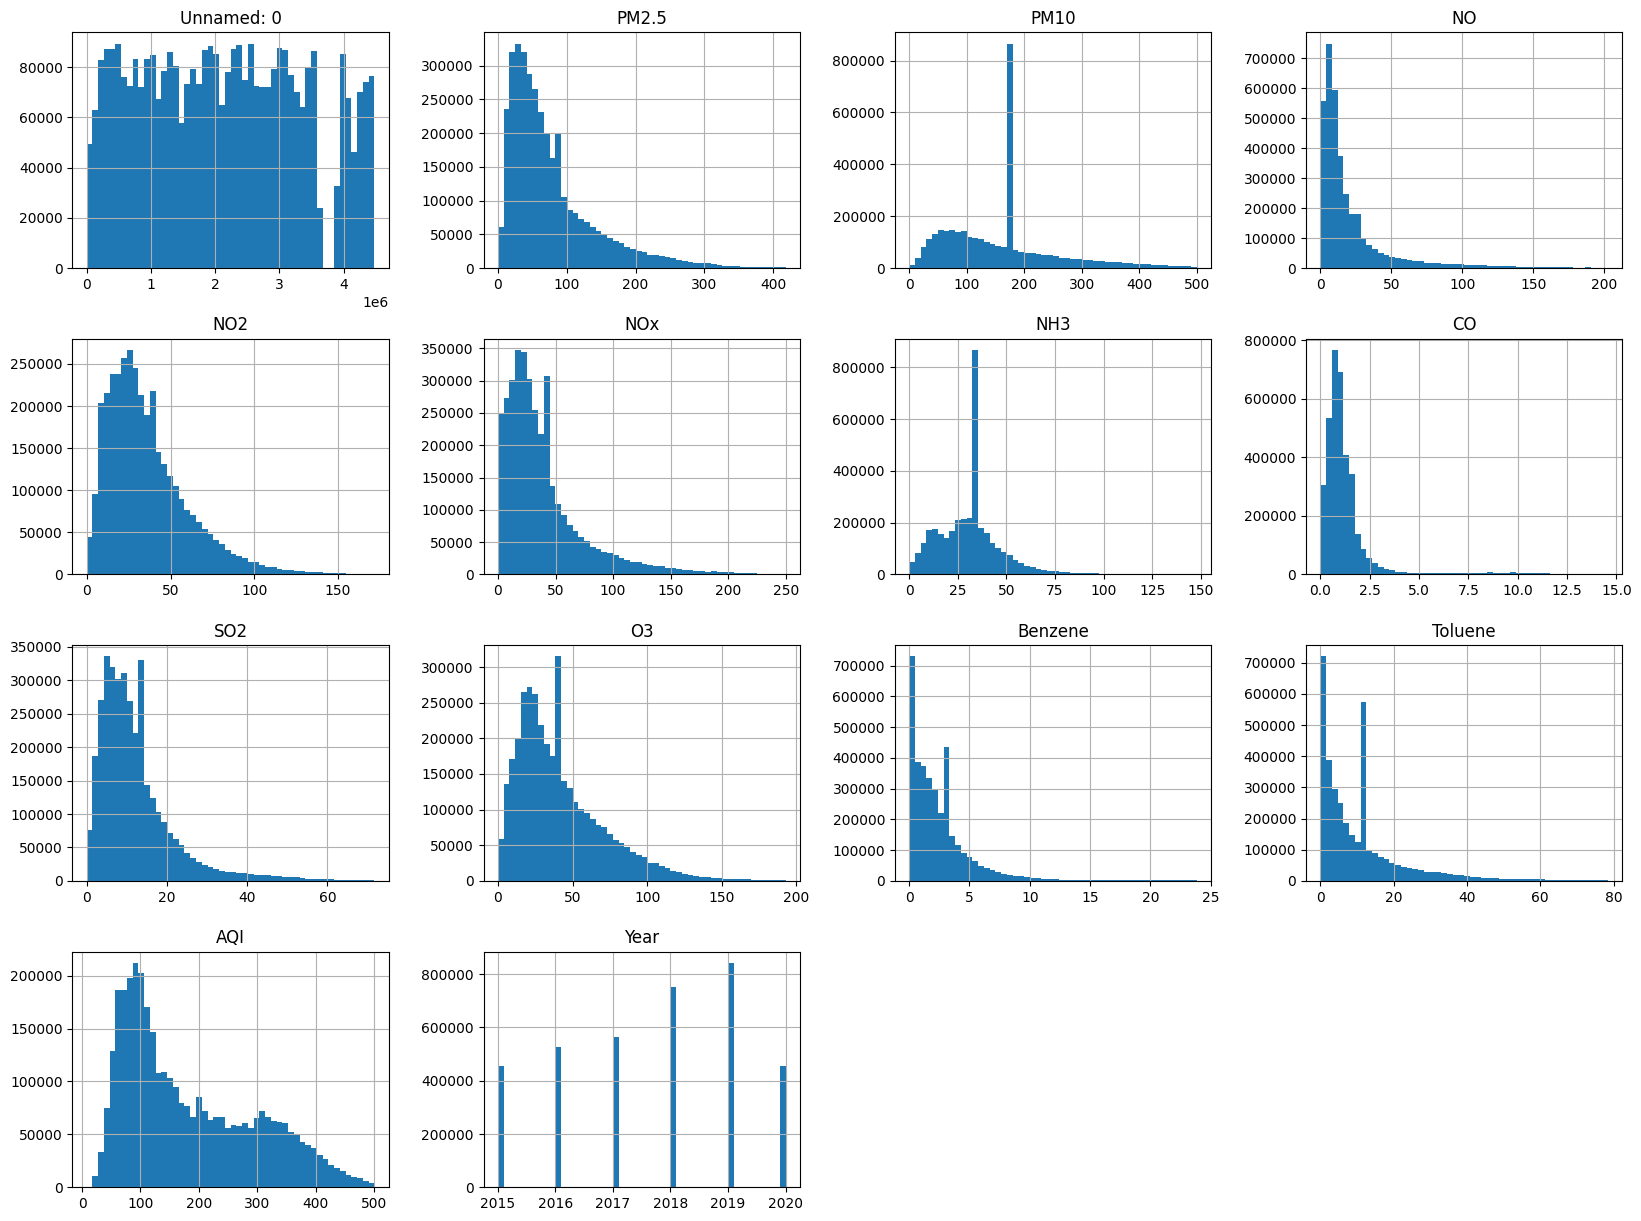

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for each column
df.hist(bins=50, figsize=(20, 15))
plt.show()


# Heatmap for finding correlation

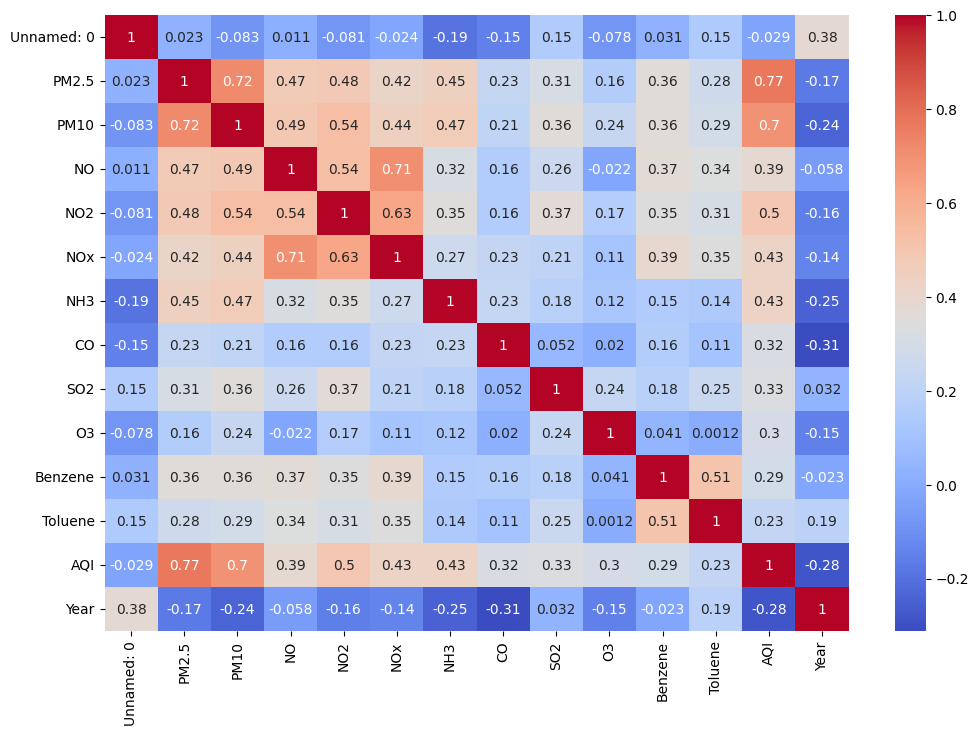

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
correlation_matrix = numeric_columns.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


# All categorical columns

In [17]:
# Select columns with object dtype (assuming categorical columns are of type 'object')
categorical_columns = df.select_dtypes(include=['object']).columns

# Print the list of categorical columns
print("Categorical columns:")
print(categorical_columns)

# Count the number of categorical columns
num_categorical_columns = len(categorical_columns)
print("Number of categorical columns:", num_categorical_columns)


Categorical columns:
Index(['City', 'Datetime', 'AQI_Bucket', 'StationId', 'StationName', 'State',
       'Status', 'Region', 'Day_period', 'Month', 'Season',
       'Weekday_or_weekend', 'Regular_day_or_holiday', 'AQ_Acceptability'],
      dtype='object')
Number of categorical columns: 14


# Finding cardinality (Different values for a particular column)

In [18]:
# List of categorical columns
categorical_columns = ['City', 'Datetime', 'AQI_Bucket', 'StationId', 'StationName', 'State',
                       'Status', 'Region', 'Day_period', 'Month', 'Season',
                       'Weekday_or_weekend', 'Regular_day_or_holiday', 'AQ_Acceptability']
# Calculate cardinality for each categorical column
cardinality = {}
for column in categorical_columns:
    cardinality[column] = df[column].nunique()

# Display cardinality of each categorical column
for column, value in cardinality.items():
    print(f"{column}: {value}")

City: 26
Datetime: 47839
AQI_Bucket: 6
StationId: 110
StationName: 110
State: 21
Status: 3
Region: 6
Day_period: 4
Month: 12
Season: 4
Weekday_or_weekend: 2
Regular_day_or_holiday: 2
AQ_Acceptability: 2


# Data encoding

In [19]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# Assume df is your original DataFrame

# Define columns to encode
columns_to_encode = ['Region', 'Day_period', 'Season', 'Weekday_or_weekend', 'Regular_day_or_holiday']

# One-hot encode categorical columns except for 'Month'
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_data = encoder.fit_transform(df[columns_to_encode])

# Convert the encoded data into a DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(columns_to_encode))

# Label encode 'Month'
label_encoder = LabelEncoder()
df['Month_encoded'] = label_encoder.fit_transform(df['Month'])

# Drop the original columns that were encoded and the original 'Month' column
df_temp = df.drop(columns=columns_to_encode + ['Month'])

# Concatenate the encoded DataFrame with the remaining original DataFrame
df_encoded = pd.concat([df_temp, encoded_df], axis=1)

# Display the encoded DataFrame
print(df_encoded.head())


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


     Unnamed: 0       City             Datetime  PM2.5       PM10    NO  \
680       680.0  Ahmedabad  2015-01-29 09:00:00  80.47  175.66042  1.42   
683       683.0  Ahmedabad  2015-01-29 12:00:00  83.53  175.66042  0.75   
684       684.0  Ahmedabad  2015-01-29 13:00:00  68.40  175.66042  0.58   
685       685.0  Ahmedabad  2015-01-29 14:00:00  67.57  175.66042  0.63   
686       686.0  Ahmedabad  2015-01-29 15:00:00  61.13  175.66042  0.43   

       NO2    NOx        NH3    CO  ...  Region_5. Western  \
680  21.90  20.65  33.800905  1.42  ...                1.0   
683  16.35  16.48  33.800905  0.75  ...                1.0   
684  13.73  12.50  33.800905  0.58  ...                1.0   
685  15.84  15.12  33.800905  0.63  ...                1.0   
686  14.07  12.90  33.800905  0.43  ...                1.0   

     Region_6. Southern  Day_period_2. Afternoon  Day_period_3. Evening  \
680                 0.0                      0.0                    0.0   
683                 0.0   

# Heatmap to visualize the relationship of all encoded columns with AQI

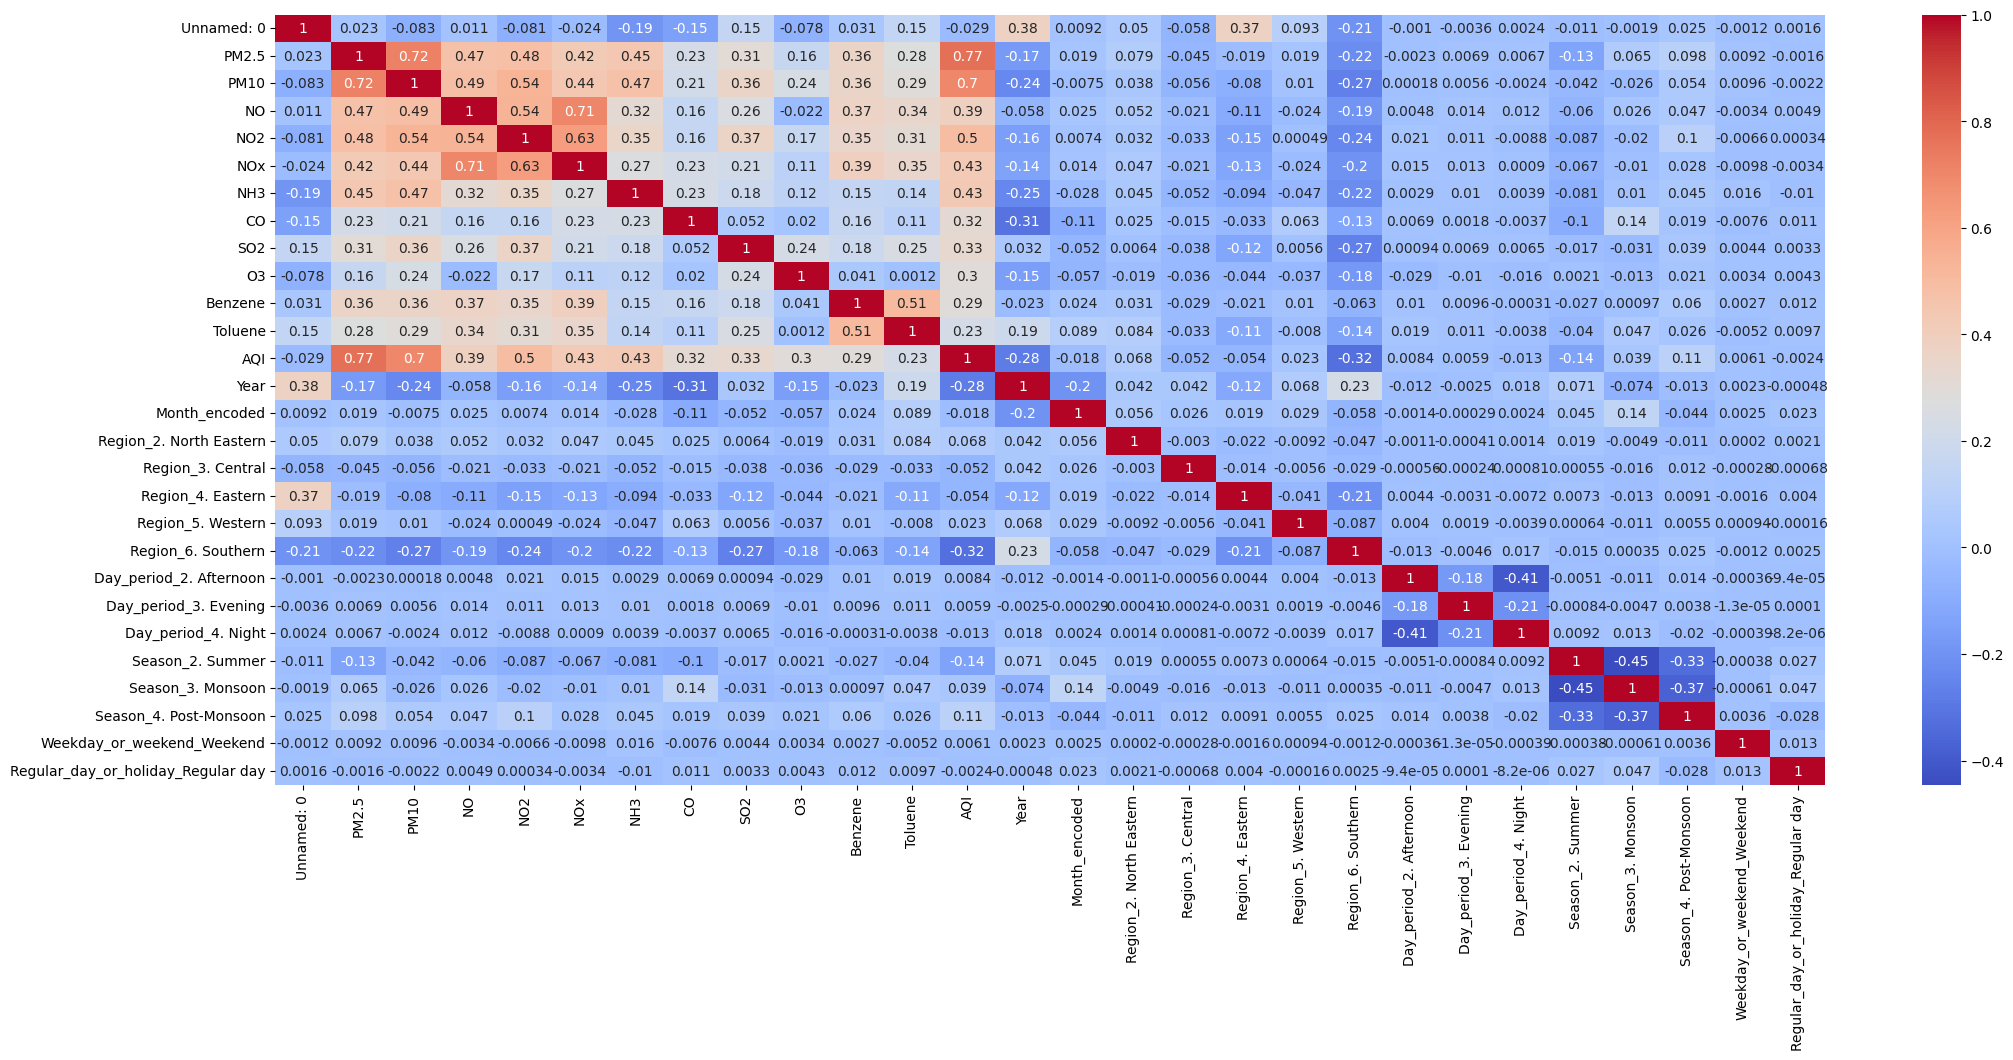

Index(['Unnamed: 0', 'City', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx',
       'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'AQI', 'AQI_Bucket',
       'StationId', 'StationName', 'State', 'Status', 'Region', 'Day_period',
       'Month', 'Year', 'Season', 'Weekday_or_weekend',
       'Regular_day_or_holiday', 'AQ_Acceptability', 'Month_encoded'],
      dtype='object')


In [20]:
# Select only numeric columns from the DataFrame
numeric_columns = df_encoded.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
correlation_matrix = numeric_columns.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(25, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()
print(df.columns)

# Reset index and rename index column

In [21]:
# Drop the current 'Serial number' column if it exists
df.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')

# Reset the index of the DataFrame
df.reset_index(drop=True, inplace=True)

# Create a new 'Serial number' column starting from 1
df['Serial number'] = df.index + 1

# Reorder the columns to move 'Serial number' to the first position
columns_order = ['Serial number'] + [col for col in df.columns if col != 'Serial number']
df = df[columns_order]

# Display the first few rows to verify
df.head()


,Serial number,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,...,Status,Region,Day_period,Month,Year,Season,Weekday_or_weekend,Regular_day_or_holiday,AQ_Acceptability,Month_encoded
0,1,Ahmedabad,2015-01-29 09:00:00,80.47,175.66042,1.42,21.90,20.65,33.800905,1.42,...,Active,5. Western,1. Morning,01. Jan,2015,1. Winter,Weekday,Regular day,Unacceptable,0
1,2,Ahmedabad,2015-01-29 12:00:00,83.53,175.66042,0.75,16.35,16.48,33.800905,0.75,...,Active,5. Western,2. Afternoon,01. Jan,2015,1. Winter,Weekday,Regular day,Unacceptable,0
2,3,Ahmedabad,2015-01-29 13:00:00,68.40,175.66042,0.58,13.73,12.50,33.800905,0.58,...,Active,5. Western,2. Afternoon,01. Jan,2015,1. Winter,Weekday,Regular day,Unacceptable,0
3,4,Ahmedabad,2015-01-29 14:00:00,67.57,175.66042,0.63,15.84,15.12,33.800905,0.63,...,Active,5. Western,2. Afternoon,01. Jan,2015,1. Winter,Weekday,Regular day,Unacceptable,0
4,5,Ahmedabad,2015-01-29 15:00:00,61.13,175.66042,0.43,14.07,12.90,33.800905,0.43,...,Active,5. Western,2. Afternoon,01. Jan,2015,1. Winter,Weekday,Regular day,Unacceptable,0


# Set all decimal upto 2 places


In [22]:
# Define the number of decimal places
decimal_places = 2

# Select only numerical columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Round numerical columns to the specified number of decimal places
df[numeric_columns] = df[numeric_columns].round(decimal_places)

# Display the first few rows of the modified DataFrame
print(df.head())
df.shape

   Serial number       City             Datetime  PM2.5    PM10    NO    NO2  \
0              1  Ahmedabad  2015-01-29 09:00:00  80.47  175.66  1.42  21.90   
1              2  Ahmedabad  2015-01-29 12:00:00  83.53  175.66  0.75  16.35   
2              3  Ahmedabad  2015-01-29 13:00:00  68.40  175.66  0.58  13.73   
3              4  Ahmedabad  2015-01-29 14:00:00  67.57  175.66  0.63  15.84   
4              5  Ahmedabad  2015-01-29 15:00:00  61.13  175.66  0.43  14.07   

     NOx   NH3    CO  ...  Status      Region    Day_period    Month  Year  \
0  20.65  33.8  1.42  ...  Active  5. Western    1. Morning  01. Jan  2015   
1  16.48  33.8  0.75  ...  Active  5. Western  2. Afternoon  01. Jan  2015   
2  12.50  33.8  0.58  ...  Active  5. Western  2. Afternoon  01. Jan  2015   
3  15.12  33.8  0.63  ...  Active  5. Western  2. Afternoon  01. Jan  2015   
4  12.90  33.8  0.43  ...  Active  5. Western  2. Afternoon  01. Jan  2015   

      Season Weekday_or_weekend Regular_day_or_hol

(3596653, 29)

# Download CSV before standardization


In [23]:
# # Save the dataframe to a CSV file
# df.to_csv('processed_data1.csv', index=False)

# # Download the file
# from google.colab import files
# files.download('processed_data1.csv')

# Standardization

In [24]:
from sklearn.preprocessing import StandardScaler

# Select numeric columns for normalization
numeric_columns = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene',
                   'Toluene', 'AQI']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Display the first few rows of the normalized data
print(df.head())

   Serial number       City             Datetime     PM2.5     PM10        NO  \
0              1  Ahmedabad  2015-01-29 09:00:00  0.051896  0.15735 -0.717443   
1              2  Ahmedabad  2015-01-29 12:00:00  0.099619  0.15735 -0.741590   
2              3  Ahmedabad  2015-01-29 13:00:00 -0.136347  0.15735 -0.747717   
3              4  Ahmedabad  2015-01-29 14:00:00 -0.149292  0.15735 -0.745915   
4              5  Ahmedabad  2015-01-29 15:00:00 -0.249729  0.15735 -0.753123   

        NO2       NOx       NH3        CO  ...  Status      Region  \
0 -0.589015 -0.525303  0.112012  0.032461  ...  Active  5. Western   
1 -0.815643 -0.641089  0.112012 -0.347962  ...  Active  5. Western   
2 -0.922628 -0.751600  0.112012 -0.444487  ...  Active  5. Western   
3 -0.836468 -0.678852  0.112012 -0.416097  ...  Active  5. Western   
4 -0.908745 -0.740493  0.112012 -0.529656  ...  Active  5. Western   

     Day_period    Month  Year     Season Weekday_or_weekend  \
0    1. Morning  01. Jan  20

# Download CSV after Standardization

In [25]:
# Save the dataframe to a CSV file
df.to_csv('processed_data2.csv', index=False)

# Download the file
from google.colab import files
files.download('processed_data2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
# Drop rows where the 'Year' column is 2020
df_filtered = df[df['Year'] != 2020]

# Verify that rows for the year 2020 have been removed
print(df_filtered['Year'].unique())


[2015 2016 2017 2018 2019]
